In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Train Data

In [2]:
train_data = pd.read_excel("Data_Train.xlsx")

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [6]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
3h         261
2h 20m     238
2h 30m     220
2h 40m     158
1h 25m     135
2h 15m     135
2h 25m      98
13h 30m     97
13h 20m     89
3h 15m      88
7h 30m      86
9h 30m      85
8h 40m      81
7h 15m      79
3h 5m       78
5h 30m      72
7h 35m      71
8h          68
7h 5m       65
9h 50m      64
9h          64
5h          63
5h 15m      62
11h 45m     62
11h         62
          ... 
35h 20m      1
30h 15m      1
31h 50m      1
29h 30m      1
5m           1
31h 30m      1
28h 30m      1
32h 20m      1
37h 10m      1
47h 40m      1
33h 20m      1
19h 50m      1
3h 25m       1
30h 25m      1
27h 30m      1
32h 55m      1
41h 20m      1
47h          1
42h 5m       1
40h 20m      1
13h 35m      1
30h 10m      1
33h 45m      1
4h 10m       1
27h 55m      1
29h 40m      1
36h 25m      1
29h 10m      1
42h 45m      1
35h 35m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
train_data.shape

(10683, 11)

In [8]:
train_data.dropna(inplace = True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data['Journey_day'] = pd.to_datetime(train_data.Date_of_Journey, format = '%d/%m/%Y').dt.day

In [11]:
train_data['Journey_month'] = pd.to_datetime(train_data.Date_of_Journey, format = '%d/%m/%Y').dt.month

In [12]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
train_data['Dep_hours'] = pd.to_datetime(train_data.Dep_Time).dt.hour
train_data['Dep_min'] = pd.to_datetime(train_data.Dep_Time).dt.minute

train_data['Arr_hour'] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data['Arr_min'] = pd.to_datetime(train_data.Arrival_Time).dt.minute

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hours,Dep_min,Arr_hour,Arr_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [15]:
train_data.drop(['Arrival_Time'], axis = 1, inplace = True)
train_data.drop(['Date_of_Journey'], axis = 1, inplace = True)
train_data.drop(['Dep_Time'], axis = 1, inplace = True)

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hours,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [17]:
duration = list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + '0m'
        else:
            duration[i] = '0h' + duration[i]
            
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_mins.append(int(duration[0].split(sep = 'm')[0].split()[-1]))

In [18]:
train_data['Duration_hours'] = duration_hours
train_data['Duration_mins'] = duration_mins

In [19]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hours,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,50
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,50
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,50


# Handling Categorical Data
There are many ways to handle categorical data: <br>
__1. Nominal Data :__ Data are not in any order. Use <font color=blue>__OneHotEncoder__</font> in this case. <br>
__2. Ordinal Data :__ Data are in order. Use <font color =blue>__LabelEncoder__</font> in this case.

In [20]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

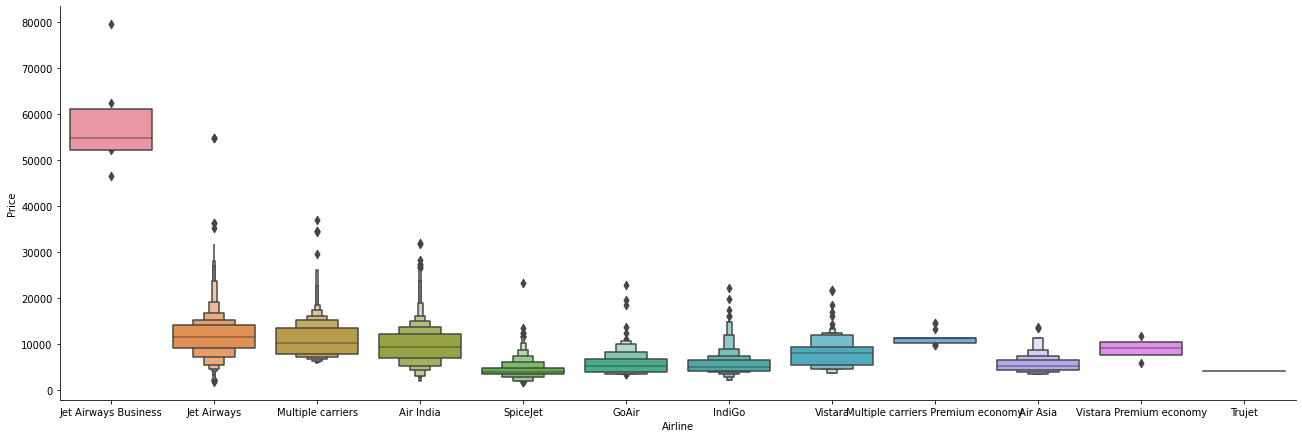

In [21]:
sns.catplot(y = 'Price', x = 'Airline', data = train_data.sort_values('Price', ascending = False), kind= 'boxen', height=6, aspect= 3)
plt.show

In [22]:
Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [23]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

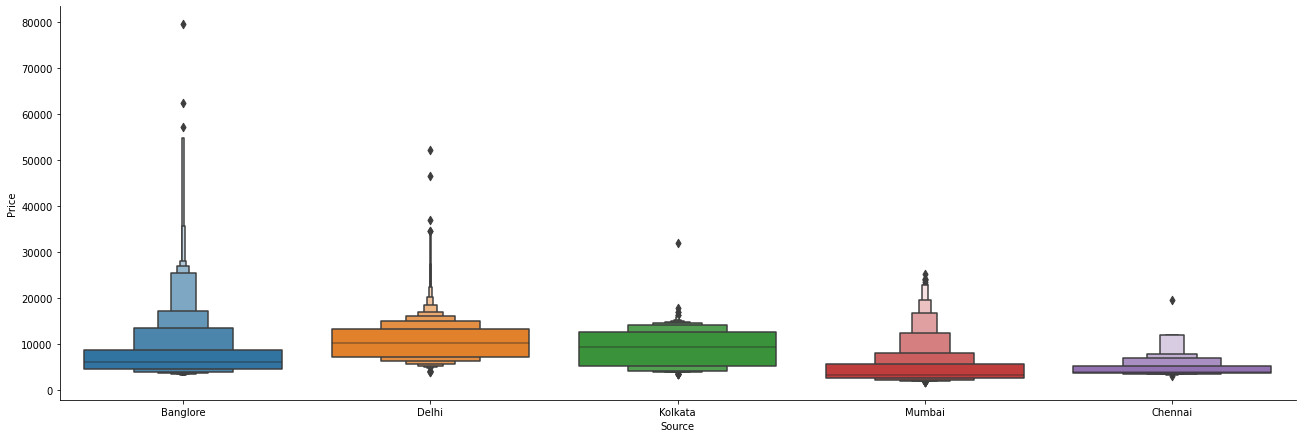

In [24]:
sns.catplot(y = 'Price', x = 'Source', data = train_data.sort_values('Price', ascending = False), kind='boxen', height=6, aspect=3)
plt.show

In [25]:
Source = train_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [26]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

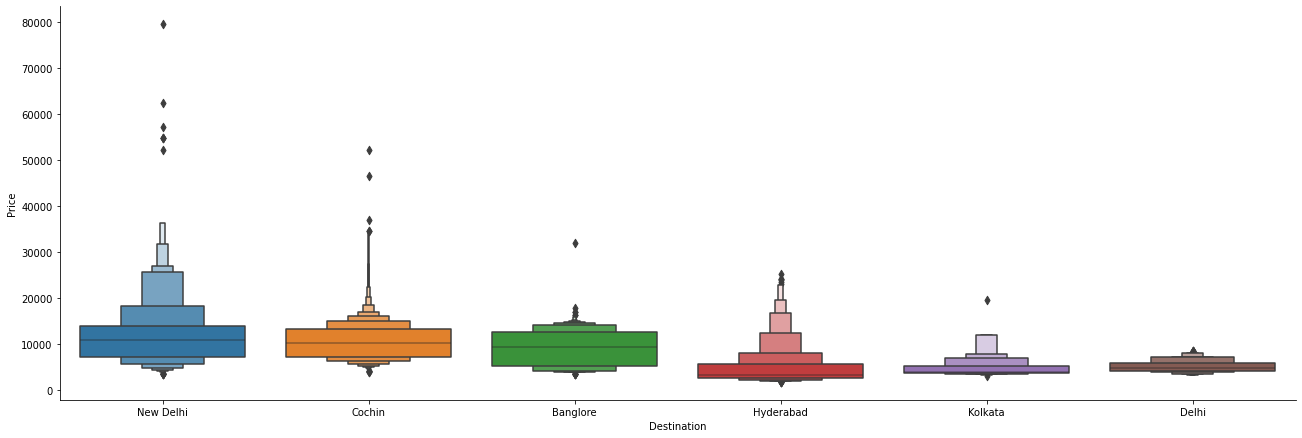

In [27]:
sns.catplot(y = 'Price', x = 'Destination', data = train_data.sort_values('Price', ascending = False), kind = 'boxen', height=6, aspect=3)
plt.show

In [28]:
Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [29]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
5                    CCU → BLR
6              BLR → BOM → DEL
7              BLR → BOM → DEL
8              BLR → BOM → DEL
9              DEL → BOM → COK
10             DEL → BLR → COK
11                   CCU → BLR
12                   MAA → CCU
13             CCU → BOM → BLR
14                   CCU → BLR
15       DEL → AMD → BOM → COK
16             DEL → PNQ → COK
17             DEL → BOM → COK
18       DEL → CCU → BOM → COK
19             DEL → BOM → COK
20             DEL → BOM → COK
21             BLR → COK → DEL
22                   BLR → DEL
23                   BLR → DEL
24             CCU → BOM → BLR
25       DEL → IDR → BOM → COK
26             DEL → LKO → COK
27             DEL → BOM → COK
28                   BLR → DEL
29                   MAA → CCU
                 ...          
10653          CCU → BOM → BLR
10654   

In [30]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

 > - As 'Additional_Info' column contains 80% 'No info'. We can drop it.

In [31]:
train_data.drop('Additional_Info', axis = 1, inplace = True)
train_data.drop('Route', axis = 1, inplace=True)

In [32]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [33]:
train_data.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops' : 3, '4 stops':4}, inplace=True)

In [34]:
train_data.drop('Duration', axis = 1, inplace=True)

In [35]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hours,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,50
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,50
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,50
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,50


In [36]:
data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [37]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hours,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,50,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
data_train.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace=True)

In [39]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hours,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,50,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
data_train.shape

(10682, 30)

# Test Data

In [41]:
test_data = pd.read_excel('Test_set.xlsx')

In [42]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [43]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [44]:
test_data['Journey_day'] = pd.to_datetime(test_data.Date_of_Journey, format = '%d/%m/%Y').dt.day
test_data['Journey_month'] = pd.to_datetime(test_data.Date_of_Journey, format = '%d/%m/%Y').dt.month

In [45]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [46]:
test_data['Dep_hours'] = pd.to_datetime(test_data.Dep_Time).dt.hour
test_data['Dep_min'] = pd.to_datetime(test_data.Dep_Time).dt.minute

test_data['Arr_hour'] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data['Arr_min'] = pd.to_datetime(test_data.Arrival_Time).dt.minute

In [47]:
duration = list(test_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + '0m'
        else:
            duration[i] = '0h' + duration[i]
            
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_mins.append(int(duration[0].split(sep = 'm')[0].split()[-1]))

In [48]:
test_data['Duration_hours'] = duration_hours
test_data['Duration_mins'] = duration_mins

In [49]:
Airline_test = test_data[['Airline']]
Airline_test = pd.get_dummies(Airline_test, drop_first=True)
Airline_test.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [50]:
Source_test = test_data[['Source']]
Source_test = pd.get_dummies(Source_test, drop_first=True)
Source_test.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [51]:
Destination_test = test_data[['Destination']]
Destination_test = pd.get_dummies(Destination_test, drop_first=True)
Destination_test.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [52]:
test_data.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops' : 3, '4 stops':4}, inplace=True)
test_data.drop('Duration', axis = 1, inplace=True)

In [53]:
test_data.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace=True)

In [54]:
test_data.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hours,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,6/06/2019,DEL → BOM → COK,17:30,04:25 07 Jun,1,No info,6,6,17,30,4,25,10,55
1,12/05/2019,CCU → MAA → BLR,06:20,10:20,1,No info,12,5,6,20,10,20,4,55
2,21/05/2019,DEL → BOM → COK,19:15,19:00 22 May,1,In-flight meal not included,21,5,19,15,19,0,23,55
3,21/05/2019,DEL → BOM → COK,08:00,21:00,1,No info,21,5,8,0,21,0,13,55
4,24/06/2019,BLR → DEL,23:55,02:45 25 Jun,0,No info,24,6,23,55,2,45,2,55


In [55]:
test_data.drop('Dep_Time', axis = 1, inplace = True)
test_data.drop('Arrival_Time', axis=1, inplace=True)

In [56]:
test_data.head()

,Date_of_Journey,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hours,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,6/06/2019,DEL → BOM → COK,1,No info,6,6,17,30,4,25,10,55
1,12/05/2019,CCU → MAA → BLR,1,No info,12,5,6,20,10,20,4,55
2,21/05/2019,DEL → BOM → COK,1,In-flight meal not included,21,5,19,15,19,0,23,55
3,21/05/2019,DEL → BOM → COK,1,No info,21,5,8,0,21,0,13,55
4,24/06/2019,BLR → DEL,0,No info,24,6,23,55,2,45,2,55


In [57]:
data_test = pd.concat([test_data, Airline_test, Source_test, Destination_test], axis = 1)

In [58]:
data_test.head()

,Date_of_Journey,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hours,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,6/06/2019,DEL → BOM → COK,1,No info,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,12/05/2019,CCU → MAA → BLR,1,No info,12,5,6,20,10,20,4,55,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,21/05/2019,DEL → BOM → COK,1,In-flight meal not included,21,5,19,15,19,0,23,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,21/05/2019,DEL → BOM → COK,1,No info,21,5,8,0,21,0,13,55,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,24/06/2019,BLR → DEL,0,No info,24,6,23,55,2,45,2,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Feature Selection
Finding out the best feature which will contribute and have good relations with target variable. <br>
Following are some of the feature selection methods;
1. <font color = blue>__heatmap__ </font>
2. <font color = blue>__feature_importance__ </font>
3. <font color = blue>__SelectKBest__ </font>

In [59]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hours',
       'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [60]:
X = data_train.drop("Price", axis = 1)
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hours,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,50,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [61]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

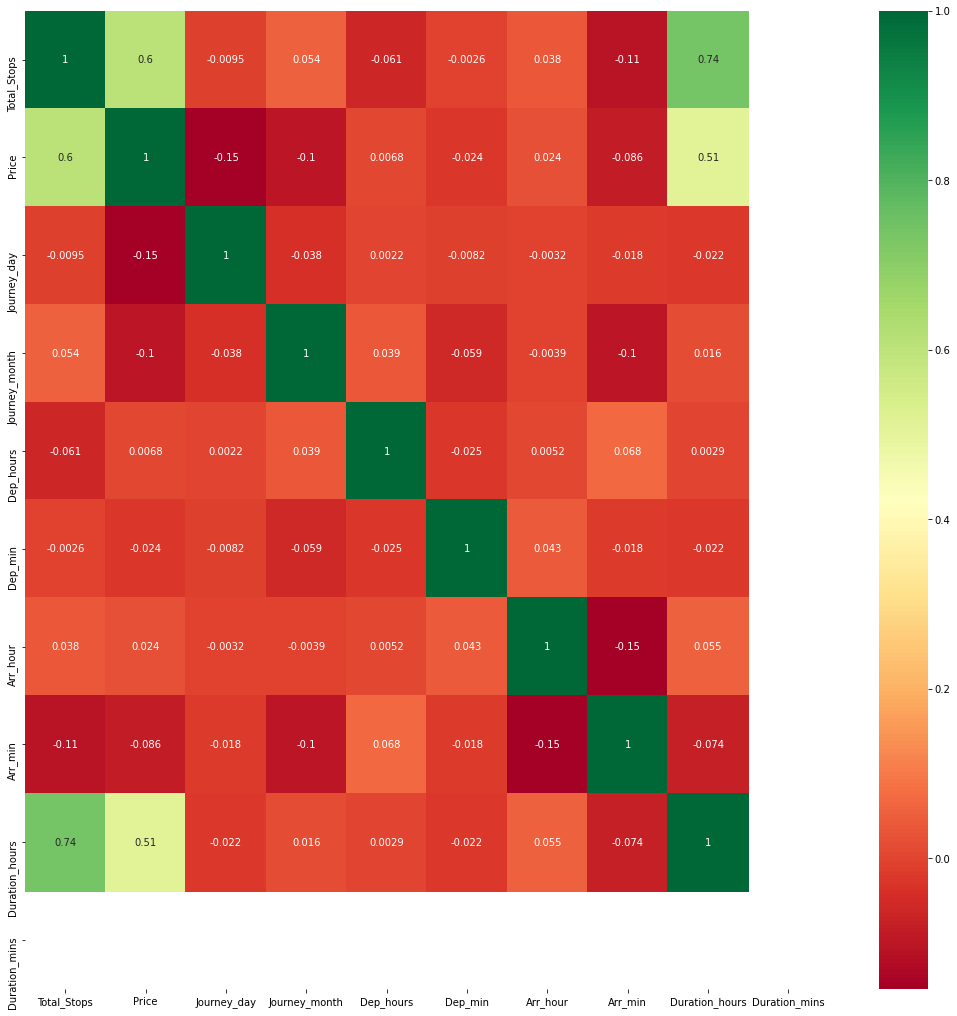

In [62]:
plt.figure(figsize=(18, 18))
sns.heatmap(train_data.corr(), annot= True, cmap = 'RdYlGn')
plt.show()

> ***

> - Important features using __ExtraTreesRegressor__

In [63]:
from sklearn.ensemble import ExtraTreesRegressor

Selection = ExtraTreesRegressor()
Selection.fit(X, y)

ExtraTreesRegressor()

In [64]:
Selection.feature_importances_

array([2.32826129e-01, 1.44461163e-01, 5.37813778e-02, 2.73744011e-02,
       2.63524203e-02, 3.05230200e-02, 2.30354821e-02, 1.22848106e-01,
       0.00000000e+00, 9.96754303e-03, 1.99728561e-03, 1.89406597e-02,
       1.37535442e-01, 6.70613226e-02, 1.83506883e-02, 7.88856855e-04,
       2.97300956e-03, 1.23034861e-04, 4.95460006e-03, 9.94663450e-05,
       4.83551037e-04, 1.05205065e-02, 3.02452505e-03, 5.26945287e-03,
       9.74114700e-03, 1.41904465e-02, 7.34249176e-03, 5.38141920e-04,
       2.48957293e-02])

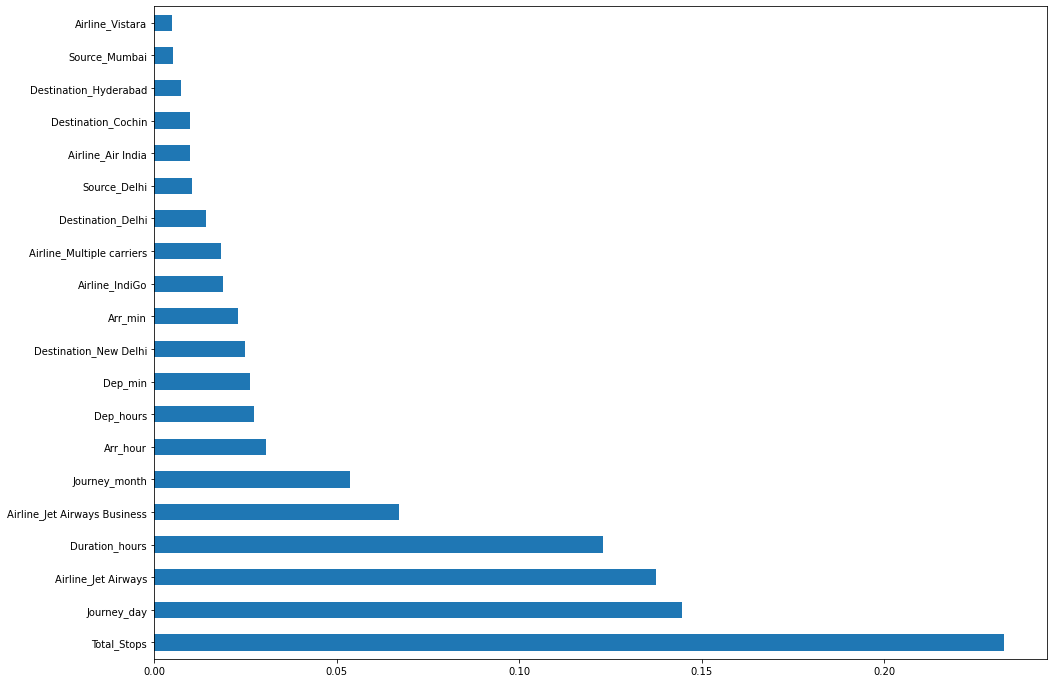

In [65]:
plt.figure(figsize=(16, 12))
feat_importance = pd.Series(Selection.feature_importances_, index = X.columns)
feat_importance.nlargest(20).plot(kind = 'barh')
plt.show()

# Fitting model using Random Forest
1. Split dataset into train and test set in order to prediction wrt. X_test
2. If needed do scaling of data
 - Saling is not done in case of __Random Forest__
3. Import model
4. Fit the data
5. Predict wrt X_test
6. In regression check for __RMSE__ Score
7. Plot graph

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [67]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [68]:
y_pred = reg_rf.predict(X_test)

In [69]:
reg_rf.score(X_train, y_train)

0.9556475681964298

In [70]:
reg_rf.score(X_test, y_test)

0.778530983169131

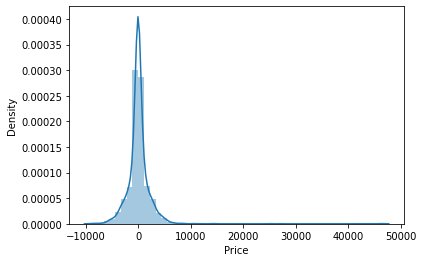

In [71]:
sns.distplot(y_test - y_pred)
plt.show()

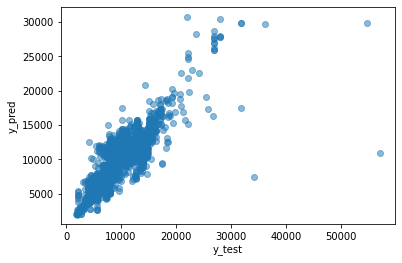

In [72]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [73]:
from sklearn import metrics

In [74]:
print("MAE : ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE : ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE :  1189.0317182097135
MSE :  4926160.622090978
RMSE :  2219.495578299488


In [75]:
metrics.r2_score(y_test, y_pred)

0.778530983169131

# Hyperparameter Tuning
 - Choose following methods for hyperparameter tuning
  1. __RandomizedSearchCV__ (fast) <br>
  2. __GridSearchCV__ <br>
 - Assign hyperparameters in form of dictionary
 - Fit the model
 - Check best parameter and best score

In [76]:
from sklearn.model_selection import RandomizedSearchCV

In [77]:
#Randomized search CV

# number of trees in rf
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num= 12)]

# number of features to be considered at every split
max_features = ['auto', 'sqrt']

# maximum number of levels in a tree 
max_depth = [int(x) for x in np.linspace(5, 30, num= 6)]

# minimum number of samples required to split a node
min_sample_split = [2, 5, 10, 15, 100]

# minimum number of samples required at each node
min_sample_leaf = [1, 2, 5, 10]

In [78]:
# Create the random grid

random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_sample_split,
               'min_samples_leaf' : min_sample_leaf}

In [79]:
rf_random = RandomizedSearchCV(estimator=reg_rf, 
                               param_distributions = random_grid, 
                               scoring='neg_mean_squared_error', 
                               n_iter=10, 
                               cv = 5, 
                               verbose= 2, 
                               random_state= 42, 
                               n_jobs=1)


In [80]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   8.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [261]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [262]:
prediction = rf_random.predict(X_test)

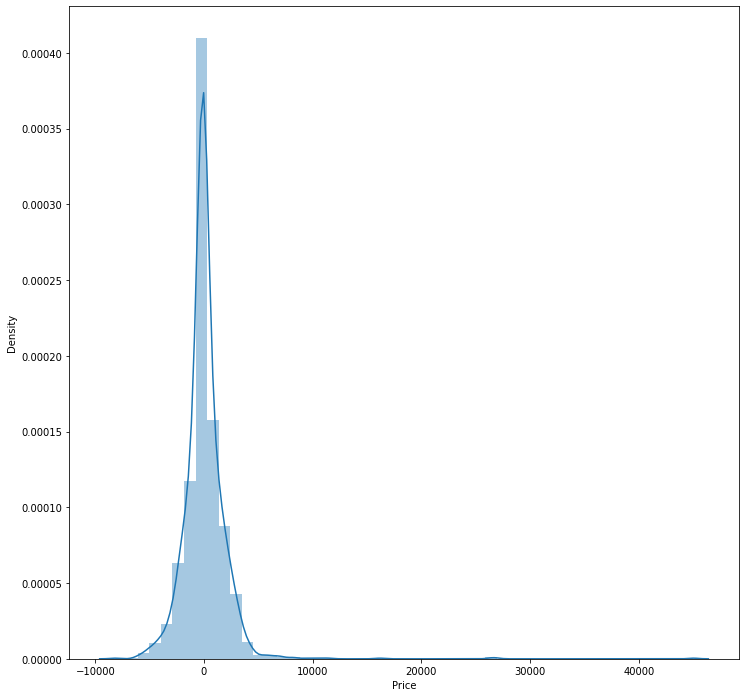

In [274]:
plt.figure(figsize = (12, 12))
sns.distplot(y_test - prediction)
plt.show()

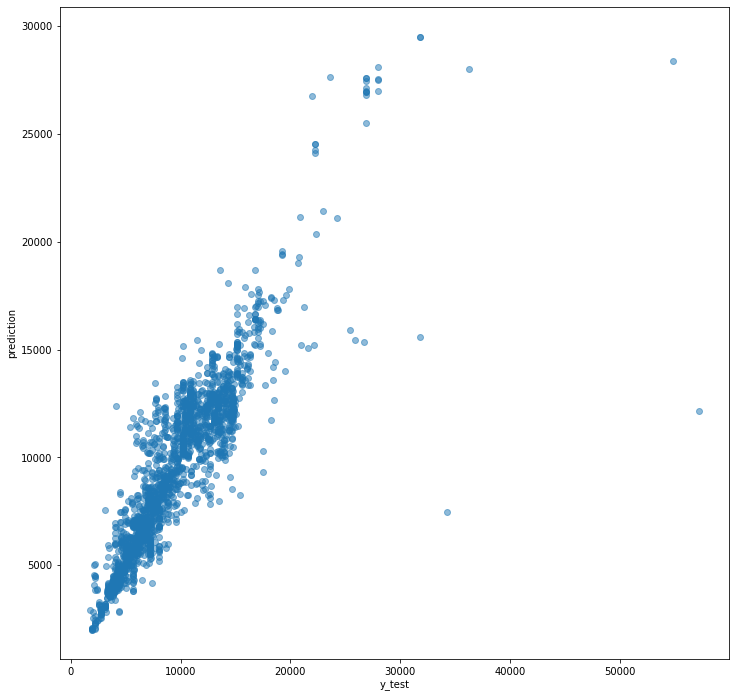

In [272]:
plt.figure(figsize= (12, 12))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("prediction")
plt.show()

In [267]:
print("MAE : ", metrics.mean_absolute_error(y_test, prediction))
print("MSE : ", metrics.mean_squared_error(y_test, prediction))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE :  1163.9239151196875
MSE :  4462448.836928027
RMSE :  2112.4509075782157


# Save the model to reuse it again

In [275]:
import pickle

#open a file where you are going to store data
file = open('Flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [276]:
model = open('Flight_rf.pkl', 'rb')
forest = pickle.load(model)

In [277]:
y_prediction = forest.predict(X_test)

In [278]:
metrics.r2_score(y_test, y_prediction)

0.7993784140653925